# Credit card Fraud

In [13]:
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("C:/MachineLearning datasets/credit card fraud/archive (7)/creditcardcsvpresent.csv")
df.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [5]:
encoder1=LabelEncoder()
encoder2=LabelEncoder()
encoder3=LabelEncoder()
encoder4=LabelEncoder()

In [6]:
df['isFradulent']=encoder1.fit_transform(df['isFradulent'])

In [7]:
df['isHighRiskCountry']=encoder2.fit_transform(df['isHighRiskCountry'])

In [8]:
df['isForeignTransaction']=encoder3.fit_transform(df['isForeignTransaction'])

In [9]:
df['Is declined']=encoder4.fit_transform(df['Is declined'])

In [10]:
x=df.drop(['Merchant_id','Transaction date','isFradulent'],axis=1)
y=df['isFradulent']
x

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,100.0,3000.0,0,5,1,1,0,0.0,0
1,100.0,4300.0,0,5,1,1,0,0.0,0
2,185.5,4823.0,1,5,0,0,0,0.0,0
3,185.5,5008.5,1,8,0,0,0,0.0,0
4,500.0,26000.0,0,0,1,1,800,677.2,6
...,...,...,...,...,...,...,...,...,...
3070,500.0,11000.0,1,0,0,0,754,585.0,7
3071,800.0,0.0,1,0,0,0,754,585.0,7
3072,800.0,20800.0,1,0,0,0,754,585.0,7
3073,1500.0,12000.0,1,0,1,1,754,585.0,7


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [15]:
with open ("model.pkl" , 'wb') as f:
    pickle.dump(lr , f)

In [16]:
with open("model.pkl" , 'rb') as f:
    model = pickle.load(f)

In [17]:
pred_tst=model.predict(x_test)
pred_trn = model.predict(x_train)
test_c = accuracy_score(y_test,pred_tst)
train_c = accuracy_score(y_train , pred_trn)

In [18]:
train_c , test_c

(0.9861788617886179, 0.9691056910569106)

In [19]:
print(classification_report(y_test,pred_tst))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       512
           1       0.95      0.86      0.90       103

    accuracy                           0.97       615
   macro avg       0.96      0.93      0.94       615
weighted avg       0.97      0.97      0.97       615



In [21]:
test_acc = accuracy_score(y_test,pred_tst)
train_acc = accuracy_score(y_train , pred_trn)
print(f'test_acc {test_acc}')
print(f'train_acc {train_acc}')

test_acc 0.9691056910569106
train_acc 0.9861788617886179


In [22]:
x.head(1)

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,100.0,3000.0,0,5,1,1,0,0.0,0


In [23]:
import numpy as np
ar=np.array([[200,4000,1,6,0,0,1,2,5]])

In [24]:
lr.predict(ar)

array([1])

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

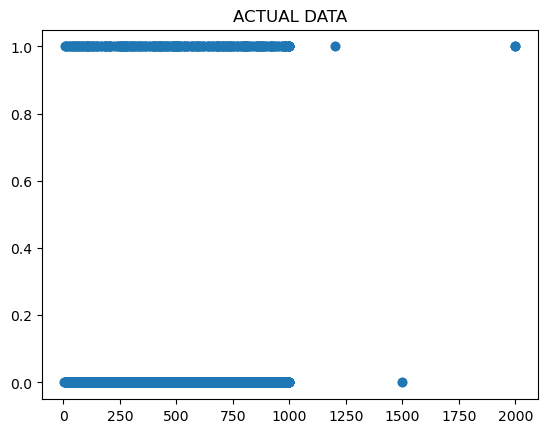

In [31]:
plt.title('ACTUAL DATA')
plt.scatter(df['Average Amount/transaction/day'],df['isFradulent'])
plt.show()

In [30]:
am=x_train['Average Amount/transaction/day']
amount=list(am)
pr=pred_trn
predictval=list(pred_trn)

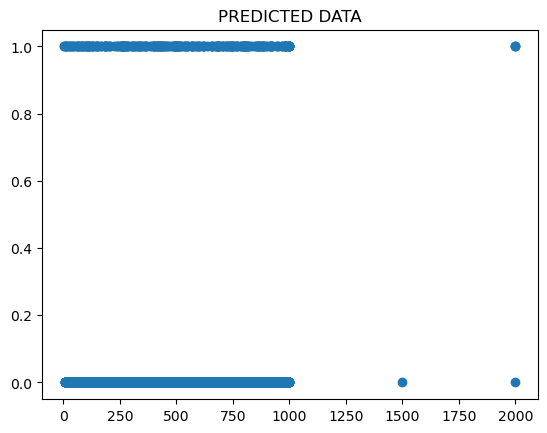

In [32]:
plt.title('PREDICTED DATA')
plt.scatter(amount,predictval)
plt.show()